<a href="https://colab.research.google.com/github/Lfagundesnetto/PUC-MVP-Dados/blob/main/PUC_Rio_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Sprint 3: Engenharia de Dados - PUC RIO**


---

## Leticia Fagundes Netto

O projeto consiste em entender os perfis e comportamento dos compradores de tênis do nosso site, a partir das datas de compras, numeração, quantidade de itens. Para potencializar as vendas com a estratégia a partir dos dados de compra.

Este banco de dados foi projetado para gerenciar e analisar os dados de uma empresa online que vende sapatos. Ele contém diversas tabelas que armazenam informações sobre os produtos, usuários, pedidos e características dos sapatos. A seguir, uma explicação detalhada de cada tabela e seu propósito:

## **Base de Dados dos Usuários e dos Pedidos**

**usuario_tabela (Informações dos Usuários):**

Campos: usuario_id, nome, sobrenome, data_nascimento, endereco, num_cep, nom_uf, email, num_sapato, genero, data_subscricao, data_at_cad

Descrição: Armazena informações pessoais dos usuários, incluindo nome, endereço, tamanho de sapato e gênero.

[Link para os códigos da Base dos Usuários](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2780749255156193/4297918334890490/8766347708895131/latest.html)

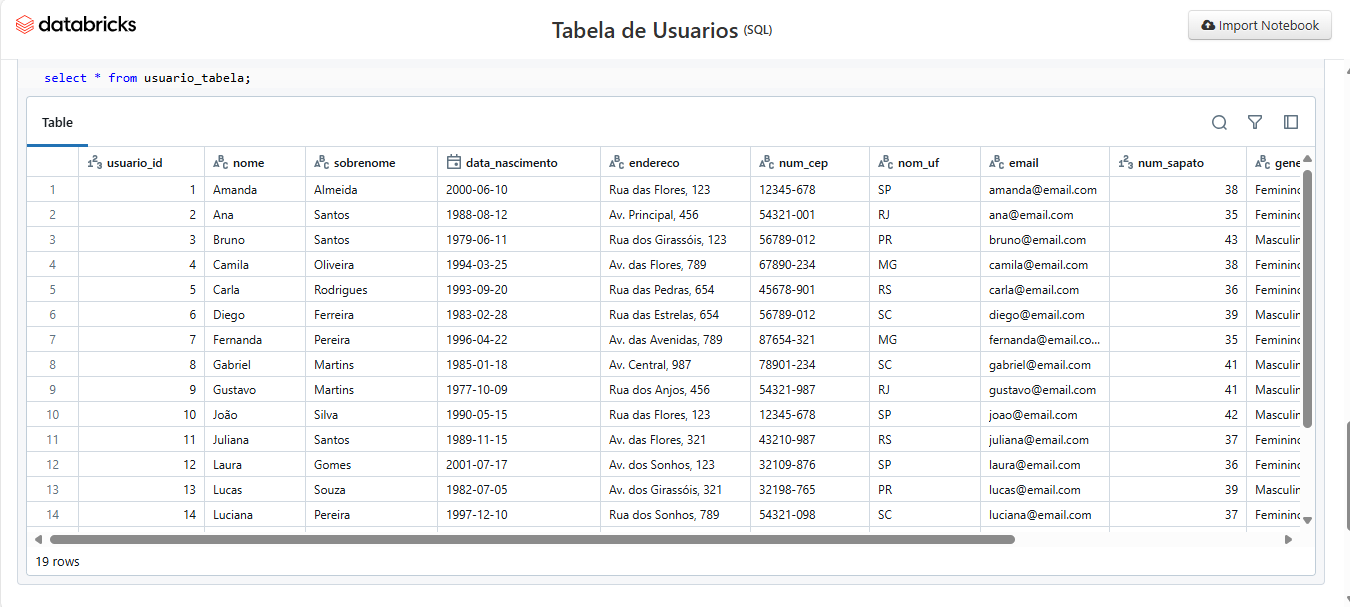


**pedidos (Pedidos Realizados):**

Campos: id_pedido, usuario_id, SapatosID, data_pedido, forma_de_pagamento, preco, data_entrega, estado_entrega

Descrição: Contém informações sobre os pedidos realizados, incluindo o ID do usuário, ID do sapato, data do pedido, forma de pagamento, preço, data de entrega e estado de entrega.

[Link para os códigos da Base dos Pedidos](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2780749255156193/4297918334890540/8766347708895131/latest.html)

## **Base de Dados dos Produtos**

Para gerenciar eficientemente a variedade de sapatos disponíveis na loja online, foi necessário criar uma tabela consolidada que combina informações detalhadas sobre cada produto, incluindo tipo, categoria, material, cor, gênero, tamanho e preços. A tabela final dos produtos, chamada produtos_tabela, foi criada a partir de uma série de etapas envolvendo a definição de tabelas auxiliares, junção de dados e cálculos de preços.

[Link para os códigos da Base dos Produtos](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2780749255156193/4297918334890490/8766347708895131/latest.html)

### **Criação das Tabelas Auxiliares**

**Tipos (Tipos de Sapatos):**
Descrição: Armazena os diferentes tipos de sapatos disponíveis, como "Anabela", "Bota", "Chinelo", etc.

**Categorias (Categorias dos Sapatos):**
Descrição: Contém as categorias dos sapatos, como "Casual", "Conforto", "Esportivo", etc.

**Materiais (Materiais dos Sapatos):**
Descrição: Armazena os diferentes materiais usados nos sapatos, como "Couro", "Camurça", "Sintético", etc.

**Cor (Cores dos Sapatos):**
Descrição: Contém as cores disponíveis para os sapatos, como "Azul", "Preto", "Branco", etc.

**Genero (Gênero dos Sapatos):**
Descrição: Armazena as informações sobre o gênero dos sapatos, como "Feminino", "Masculino", "Unissex".

**Tamanho (Tamanhos dos Sapatos):**
Descrição: Contém os tamanhos disponíveis para os sapatos, como "35", "36", "37", etc.

**Preços (Preços dos Sapatos):**
Descrição: Contém os sapatos com seus preços base e final, ajustados com base no tipo de material.

---
    CREATE TABLE Tipos (
    TipoID INT AUTO_INCREMENT PRIMARY KEY,
    Nome TEXT
    );

    CREATE TABLE Categorias (
    CategoriaID INT AUTO_INCREMENT PRIMARY KEY,
    Nome TEXT
    );

    CREATE TABLE Materiais (
    MaterialID INT AUTO_INCREMENT PRIMARY KEY,
    Nome TEXT
    );

    CREATE TABLE Cor (
    CorID INT AUTO_INCREMENT PRIMARY KEY,
    Nome TEXT
    );

    CREATE TABLE Genero (
    GenID INT AUTO_INCREMENT PRIMARY KEY,
    Nome TEXT
    );

    CREATE TABLE Tamanho (
    TamID INT AUTO_INCREMENT PRIMARY KEY,
    Nome TEXT
    );

**Inserção de Dados nas Tabelas Auxiliares**

---
    INSERT INTO Tipos (Nome) VALUES ('Anabela'), ('Bota'), ('Bota Coturno'),
    ('Chinelo'), ('Rasteiras'), ('Salto Alto'), ('Sandálias'), ('Sapatênis'), ('Sapato Social'), ('Tênis');

    INSERT INTO Categorias (Nome) VALUES ('Casual'), ('Conforto'), ('Casual & Conforto'), ('Esportivo'), ('Social/Formal'), ('Trabalho/Executivo'), ('Outdoor'), ('Verão'), ('Inverno'), ('Moda');
    
    INSERT INTO Materiais (Nome) VALUES ('Couro'), ('Camurça'), ('Tecido'), ('Lona'), ('Sintético'), ('Borracha'), ('Plástico'), ('Tecido de malha'), ('Nylon');
    
    INSERT INTO Cor (Nome) VALUES ('Azul'), ('Azul Marinho'), ('Bege'), ('Branco'), ('Vermelho'), ('Cinza'), ('Dourado'), ('Marrom'), ('Prata'), ('Preto'), ('Rosa');
      
    INSERT INTO Genero (Nome) VALUES ('Feminino'), ('Masculino'), ('Unissex');

    INSERT INTO Tamanho (Nome) VALUES ('35'), ('36'), ('37'), ('38'), ('39'), ('40'), ('41'), ('42'), ('43');

### **Criação da Tabela de Calçados e Inserção de Dados**




---
    CREATE TABLE Calcados (
    CalcadoID INT,
    TipoID INT,
    CategoriaID INT,
    MaterialID INT,
    CorID INT,
    GenID INT,
    TamID INT,
    TipoNome STRING,
    CategoriaNome STRING,
    MaterialNome STRING,
    CorNome STRING,
    GenNome STRING,
    TamNome INT
    );


Dados foram inseridos na tabela Calcados com base em combinações possíveis de tipos, categorias, materiais, cores, gêneros e tamanhos. Para simplificar, foi utilizado um comando de CROSS JOIN para gerar todas as combinações possíveis e em seguida, filtros foram aplicados para remover combinações inválidas:


---
    INSERT INTO Calcados (TipoNome, CategoriaNome, MaterialNome, CorNome, GenNome, TamNome)
    SELECT Tipos.Nome, Categorias.Nome, Materiais.Nome, Cor.Nome, Genero.Nome, Tamanho.Nome
    FROM Tipos
    CROSS JOIN Categorias
    CROSS JOIN Materiais
    CROSS JOIN Cor
    CROSS JOIN Genero
    CROSS JOIN Tamanho;

### **Criação de Visualizações Temporárias**

```
CREATE VIEW vw_tentativas AS

WITH Anabele AS (
    SELECT TipoNome, CategoriaNome, MaterialNome, CorNome, GenNome, TamNome
    FROM calcados
    WHERE TipoNome = 'Anabela' AND MaterialNome IN ('Camurça', 'Sintético', 'Tecido') AND CategoriaNome IN ('Casual & Conforto', 'Moda') AND CorNome NOT IN ('Rosa', 'Vermelho')
),
Botas AS (
    SELECT TipoNome, CategoriaNome, MaterialNome, CorNome, GenNome, TamNome
    FROM calcados
    WHERE TipoNome = 'Bota' AND MaterialNome IN ('Sintético', 'Borracha') AND CategoriaNome IN ('Casual', 'Outdoor', 'Inverno') AND CorNome IN ('Preto', 'Cinza', 'Branco')
),

-- Demais combinações de visualizações para outros tipos de sapatos...

SELECT * FROM Anabele
UNION ALL
SELECT * FROM Botas

# UNION ALL para as demais visualizações...

;

```

### **Criação da Tabela sapatos_todos e Adição de Preços**

```
CREATE TABLE sapatos_todos AS
SELECT * FROM vw_tentativas;

ALTER TABLE sapatos_todos ADD SapatosID INT AUTO_INCREMENT PRIMARY KEY;
ALTER TABLE sapatos_todos ADD PrecoBase DECIMAL, ADD PrecoFinal DECIMAL;

UPDATE sapatos_todos
SET PrecoBase = CASE TipoNome
                    WHEN 'Anabela' THEN 100.00
                    WHEN 'Bota' THEN 150.00
                    WHEN 'Bota Coturno' THEN 180.00
                    WHEN 'Chinelo' THEN 30.00
                    WHEN 'Salto Alto' THEN 160.00
                    WHEN 'Sandálias' THEN 80.00
                    WHEN 'Sapatênis' THEN 100.00
                    WHEN 'Sapato Social' THEN 150.00
                    WHEN 'Tênis' THEN 170.00
                END;

UPDATE sapatos_todos
SET PrecoFinal = PrecoBase + (CASE MaterialNome
                                 WHEN 'Camurça' THEN PrecoBase * 0.25
                                 WHEN 'Tecido' THEN PrecoBase * 0.20
                                 WHEN 'Sintético' THEN PrecoBase * 0.15
                                 WHEN 'Borracha' THEN PrecoBase * 0.15
                                 WHEN 'Couro' THEN PrecoBase * 0.30
                                 WHEN 'Lona' THEN PrecoBase * 0.10
                                 WHEN 'Plástico' THEN PrecoBase * 0.13
                                 WHEN 'Tecido de malha' THEN PrecoBase * 0.32
                                 WHEN 'Nylon' THEN PrecoBase * 0.18
                                 ELSE 0
                               END);
```

### **Criação da Tabela Final de Produtos**


```
CREATE VIEW Tabela_Produtos AS (
    SELECT SapatosID, TipoNome, CategoriaNome, MaterialNome, CorNome, GenNome, TamNome, PrecoFinal
    FROM sapatos_todos
);

CREATE TABLE produtos_tabela AS
SELECT * FROM Tabela_Produtos;

ALTER TABLE produtos_tabela ADD INDEX idx_SapatosID (SapatosID);
```

A tabela final de produtos produtos_tabela foi criada através de uma série de passos que envolvem a definição de atributos detalhados dos sapatos, inserção de dados, criação de visualizações temporárias para facilitar a manipulação dos dados, e cálculo de preços base e final. Esta tabela consolidada permite uma gestão eficiente dos produtos, facilita a análise de vendas e a personalização de campanhas de marketing.

## **Lista dos Pedidos com as Informações do Usuário (Relacionando as diferentes bases de dados)**

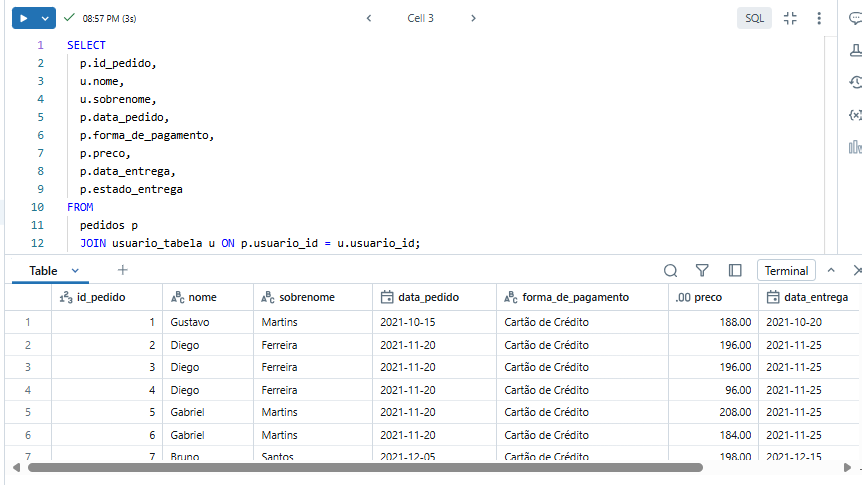

### **Exemplos de Consultas e Visualizações**

[Evolução das Vendas ao Longo do Tempo:](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2780749255156193/3779988199760469/8766347708895131/latest.html)

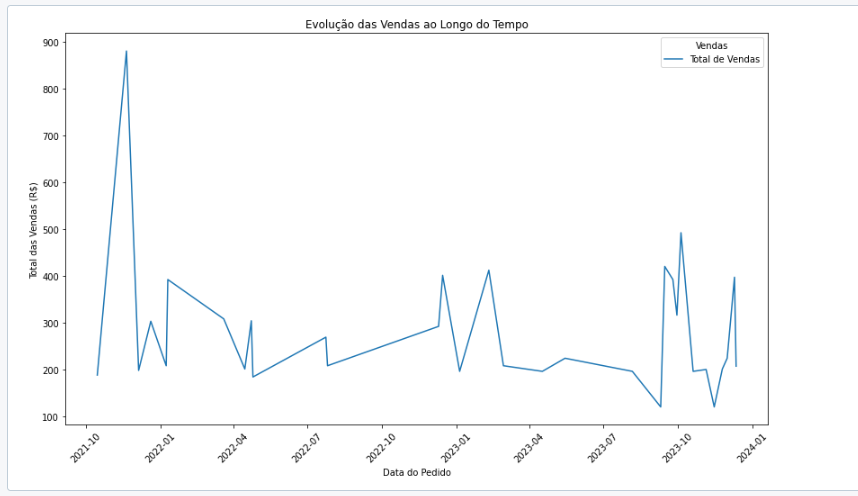

[Análise de Vendas por Estado](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2780749255156193/3779988199760444/8766347708895131/latest.html)

[Preferências de Calçados por Gênero do Usuário](https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/2780749255156193/3779988199760431/8766347708895131/latest.html)